In [1]:
!pip install polars


In [35]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import sklearn
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import AgglomerativeClustering
import hdbscan
import numpy as np
import os

df_nl = pl.read_parquet("/content/elfen_features_nl.parquet")


In [104]:
print("Stats:\n", df_nl.describe())

Stats:
 shape: (9, 207)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬───────────┐
│ statistic  ┆ text      ┆ raw_seque ┆ n_tokens  ┆ … ┆ n_ordinal ┆ n_fac    ┆ n_law    ┆ n_languag │
│ ---        ┆ ---       ┆ nce_lengt ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---      ┆ e         │
│ str        ┆ str       ┆ h         ┆ f64       ┆   ┆ f64       ┆ f64      ┆ f64      ┆ ---       │
│            ┆           ┆ ---       ┆           ┆   ┆           ┆          ┆          ┆ f64       │
│            ┆           ┆ f64       ┆           ┆   ┆           ┆          ┆          ┆           │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪═══════════╡
│ count      ┆ 3782      ┆ 3782.0    ┆ 3782.0    ┆ … ┆ 3782.0    ┆ 3782.0   ┆ 3782.0   ┆ 3782.0    │
│ null_count ┆ 0         ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ 0.0       │
│ mean       ┆ null      ┆ 715.46351 ┆ 135.45187 ┆ … ┆ 0.152829  ┆ 

In [105]:
coded_transcript = pd.read_csv('/content/coded_transcript_10 (1).csv')

In [106]:
coded_transcript

,Unnamed: 0,speaker,party,utterance,n_utterance,n_utterances,source_doc_id,source_doc_title,Llama3_Code,Falcon_Code,Mistral_Code
0,7429,De voorzitter,NaN,Ik heropen de vergadering. Aan de orde is het ...,1,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"Main idea: ""The meeting is opened to discuss t...",The main idea of the sentence is that the deba...,"This sentence is about opening a meeting, welc..."
1,7430,De voorzitter,NaN,We gaan beginnen met de eerste termijn van de ...,2,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Start of parliamentary debate.<|eot_id|><|star...,We will begin by discussing the first term on ...,This sentence is about starting the first term...
2,7431,Daniëlle Jansen,NSC,Voorzitter. Ik wil u eerst meenemen in een cas...,3,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"The main idea of this sentence is: ""Protecting...","""The Dutch government has announced that it wi...",The main idea of this text is a call to protec...
3,7432,Crijns,PVV,Mevrouw Jansen heeft eigenlijk elke keer hetze...,4,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"""Mevrouw Jansen's speech"" or ""Registration of ...",The main idea of the sentence is that Mevrouw ...,Mevrouw Jansen repeatedly tells the same story...
4,7433,Daniëlle Jansen,NSC,Nieuw Sociaal Contract ziet de registratieplic...,5,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Rookvrije generatie</assistant>: Rookvrije,The main idea of the sentence is that the regi...,This sentence is about a new social contract v...
...,...,...,...,...,...,...,...,...,...,...,...
3777,505,De Vos,FVD,"Nogmaals, die consensus is er niet. Ik heb ver...",506,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"The main idea of this sentence is: ""The minist...",<human>: <human>: <human>: <human,The speaker values science and its independenc...
3778,506,De voorzitter,NaN,"Afrondend, mevrouw De Vos.",507,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"The main idea is: ""Goodbye, Mrs. De Vos.""",The sentence describes a meeting between two p...,The sentence appears to be in Dutch and transl...
3779,507,De Vos,FVD,"Ja, tot slot. We gaan hier duidelijk niet uit ...",508,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"The main idea of this sentence is: ""The minist...",<noinput>,The speaker defends her position based on scie...
3780,508,Erkens,VVD,De minister gaf op een aantal andere vlakken a...,509,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"""What else can be done?"" or ""What more can be ...",The Minister of Energy is now speaking. Minis...,The minister focused on explaining the acceler...


In [107]:
df_nl

text,raw_sequence_length,n_tokens,n_sentences,tokens_per_sentence,n_characters,avg_word_length,n_types,n_long_words,n_lemmas,n_VERB_VerbForm_Fin,n_VERB_VerbForm_Inf,n_VERB_VerbForm_Part,n_VERB_Tense_Past,n_VERB_Tense_Pres,n_VERB_Number_Plur,n_VERB_Number_Sing,n_NOUN_Gender_Com,n_NOUN_Gender_Neut,n_NOUN_Number_Plur,n_NOUN_Number_Sing,n_PRON_PronType_Dem,n_PRON_PronType_Ind,n_PRON_PronType_Int,n_PRON_PronType_Prs,n_PRON_PronType_Rcp,n_PRON_PronType_Rel,n_PRON_Poss_Yes,n_PRON_Reflex_Yes,n_PRON_Case_Acc,n_PRON_Case_Nom,n_PRON_Case_Dat,n_PRON_Person_1,n_PRON_Person_2,n_PRON_Person_3,n_ADJ_Degree_Cmp,n_ADJ_Degree_Pos,…,rix,synsets,synsets_noun,synsets_verb,synsets_adj,synsets_adv,avg_n_synsets,avg_n_synsets_noun,avg_n_synsets_verb,avg_n_synsets_adj,n_low_synsets,n_high_synsets,n_high_synsets_noun,n_high_synsets_verb,n_low_synsets_noun,n_low_synsets_verb,n_low_synsets_adj,n_low_synsets_adv,n_entities,n_org,n_cardinal,n_date,n_gpe,n_person,n_money,n_product,n_time,n_percent,n_work_of_art,n_quantity,n_norp,n_loc,n_event,n_ordinal,n_fac,n_law,n_language
str,u16,u16,u16,f64,u16,f64,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,…,f64,list[i64],list[i64],list[i64],list[i64],list[i64],f64,f64,f64,f64,u32,u32,u32,u32,u32,u32,u32,u32,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16,u16
"""Ik heropen de vergadering. Aan…",503,86,6,14.333333,426,4.953488,58,28,54,3,1,1,0,3,1,2,13,6,5,19,0,1,0,2,0,1,0,1,1,1,0,1,0,2,0,3,…,4.666667,"[0, 2, … 0]","[2, 6, … 1]","[0, 0, … 0]","[0, 0, 0]","[0, 0, 0]",1.0,1.458333,0.0,0.0,29,1,1,0,18,5,3,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
"""We gaan beginnen met de eerste…",171,35,2,17.5,141,4.028571,30,9,29,3,3,0,0,3,1,2,5,1,0,6,0,0,0,2,0,1,1,0,0,1,0,1,1,0,0,1,…,4.5,"[12, 4, … 15]","[1, 9, … 15]","[12, 4, … 0]","[0, 0]",[],4.285714,6.333333,3.666667,0.0,6,4,3,1,1,3,2,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
"""Voorzitter. Ik wil u eerst mee…",6170,1114,78,14.282051,5182,4.651706,475,333,411,65,35,24,19,46,19,46,99,48,46,144,8,8,7,68,1,9,21,5,10,20,0,18,3,69,12,74,…,4.269231,"[1, 0, … 2]","[1, 1, … 2]","[0, 1, … 0]","[0, 0, … 0]","[0, 0, … 0]",0.964215,1.642105,1.370968,0.032609,417,31,17,14,134,94,92,97,30,2,7,8,5,2,0,0,0,2,0,0,0,1,0,3,0,0,0
"""Mevrouw Jansen heeft eigenlijk…",501,86,6,14.333333,426,4.953488,61,33,58,6,3,2,0,6,2,4,12,3,3,14,0,0,0,7,0,0,2,0,1,4,0,4,1,2,0,6,…,5.5,"[6, 0, … 0]","[6, 2, … 9]","[0, 0, … 0]","[0, 0, … 0]","[0, 0, … 0]",1.974359,3.235294,2.0,0.0,28,9,7,2,9,8,6,5,5,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0
"""Nieuw Sociaal Contract ziet de…",814,144,7,20.571429,681,4.729167,91,47,86,7,4,5,1,6,0,7,15,7,7,22,4,0,1,3,0,1,0,0,0,3,0,1,2,6,0,8,…,6.714286,"[0, 0, … 3]","[0, 1, … 8]","[0, 12, … 3]","[0, 0, … 0]","[0, 0, … 0]",1.363636,2.137931,1.75,0.0,55,8,6,2,21,13,9,12,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Nogmaals, die consensus is er …",1658,315,21,15.0,1375,4.365079,157,82,137,19,6,11,1,18,2,17,34,8,5,42,5,1,0,22,0,3,0,0,4,16,0,12,5,11,0,18,…,3.904762,"[0, 2, … 0]","[2, 8, … 1]","[0, 0, … 0]","[0, 0, … 0]","[0, 0, … 0]",1.120567,2.617021,0.972222,0.0,121,11,7,4,33,30,19,39,3,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
"""Afrondend, mevrouw De Vos.""",26,6,3,2.0,23,3.833333,6,2,6,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0.666667,[6],[6],[],[],[],6.0,6.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""Ja, tot slot. We gaan hier dui…",1204,235,12,19.583333,995,4.234043,128,60,120,17,4,6,3,14,3,14,20,12,4,29,3,0,0,22,1,1,0,0,4,15,0,16,1,9,0,13,…,5.0,"[7, 12, … 6]","[7, 8, … 6]","[12, 9, … 4]","[0, 0, … 1]","[0, 0, … 0]",1.427273,3.272727,1.777778,0.0625,90,17,12,5,20,20,16,34,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0


In [108]:
df_elfen = pl.read_parquet("elfen_features_nl.parquet").to_pandas()

df_transcript = pd.read_csv("/content/coded_transcript_10 (1).csv")

df_merged = pd.merge(df_transcript, df_elfen, left_on="utterance", right_on="text", how="inner")


In [109]:
df_merged

,Unnamed: 0,speaker,party,utterance,n_utterance,n_utterances,source_doc_id,source_doc_title,Llama3_Code,Falcon_Code,...,n_percent,n_work_of_art,n_quantity,n_norp,n_loc,n_event,n_ordinal,n_fac,n_law,n_language
0,7429,De voorzitter,NaN,Ik heropen de vergadering. Aan de orde is het ...,1,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"Main idea: ""The meeting is opened to discuss t...",The main idea of the sentence is that the deba...,...,0,0,0,0,0,0,0,0,0,0
1,7430,De voorzitter,NaN,We gaan beginnen met de eerste termijn van de ...,2,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Start of parliamentary debate.<|eot_id|><|star...,We will begin by discussing the first term on ...,...,0,0,0,0,0,0,1,0,0,0
2,7431,Daniëlle Jansen,NSC,Voorzitter. Ik wil u eerst meenemen in een cas...,3,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"The main idea of this sentence is: ""Protecting...","""The Dutch government has announced that it wi...",...,2,0,0,0,1,0,3,0,0,0
3,7432,Crijns,PVV,Mevrouw Jansen heeft eigenlijk elke keer hetze...,4,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"""Mevrouw Jansen's speech"" or ""Registration of ...",The main idea of the sentence is that Mevrouw ...,...,0,0,0,0,0,0,0,0,0,0
4,7433,Daniëlle Jansen,NSC,Nieuw Sociaal Contract ziet de registratieplic...,5,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Rookvrije generatie</assistant>: Rookvrije,The main idea of the sentence is that the regi...,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,507,De Vos,FVD,"Ja, tot slot. We gaan hier duidelijk niet uit ...",508,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"The main idea of this sentence is: ""The minist...",<noinput>,...,0,0,0,0,0,0,3,0,0,0
6322,508,Erkens,VVD,De minister gaf op een aantal andere vlakken a...,509,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"""What else can be done?"" or ""What more can be ...",The Minister of Energy is now speaking. Minis...,...,0,0,0,0,0,0,0,0,0,0
6323,508,Erkens,VVD,De minister gaf op een aantal andere vlakken a...,509,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,"""What else can be done?"" or ""What more can be ...",The Minister of Energy is now speaking. Minis...,...,0,0,0,0,0,0,0,0,0,0
6324,509,De voorzitter,NaN,"Hartelijk dank aan de minister, de leden, de o...",510,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,Thank you. Main idea: Voting on motions on Mar...,"Thank you to the Minister, the leaders, the su...",...,0,0,0,1,0,0,0,0,0,0


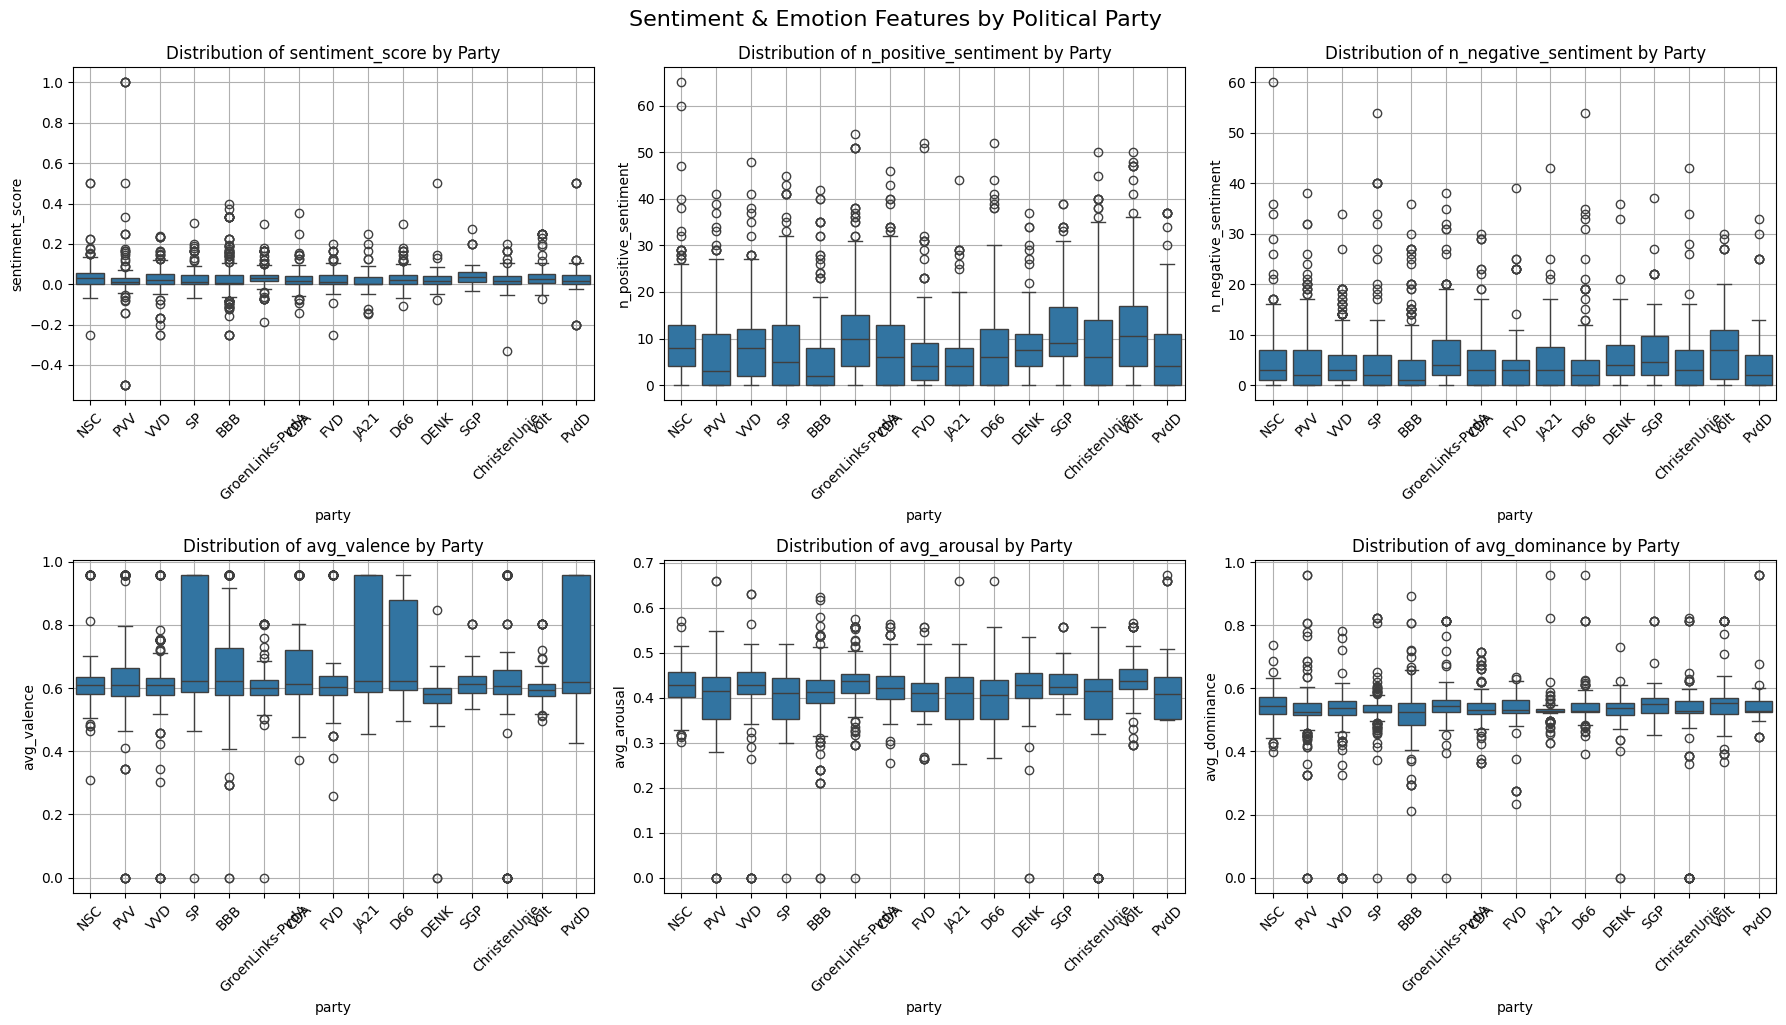

In [110]:
features = [
    "sentiment_score", "n_positive_sentiment", "n_negative_sentiment",
    "avg_valence", "avg_arousal", "avg_dominance"
]

df_filtered = df_merged.dropna(subset=["party"] + features)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(data=df_filtered, x="party", y=feature, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature} by Party", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

plt.tight_layout()
plt.suptitle("Sentiment & Emotion Features by Political Party", fontsize=16, y=1.02)
plt.show()


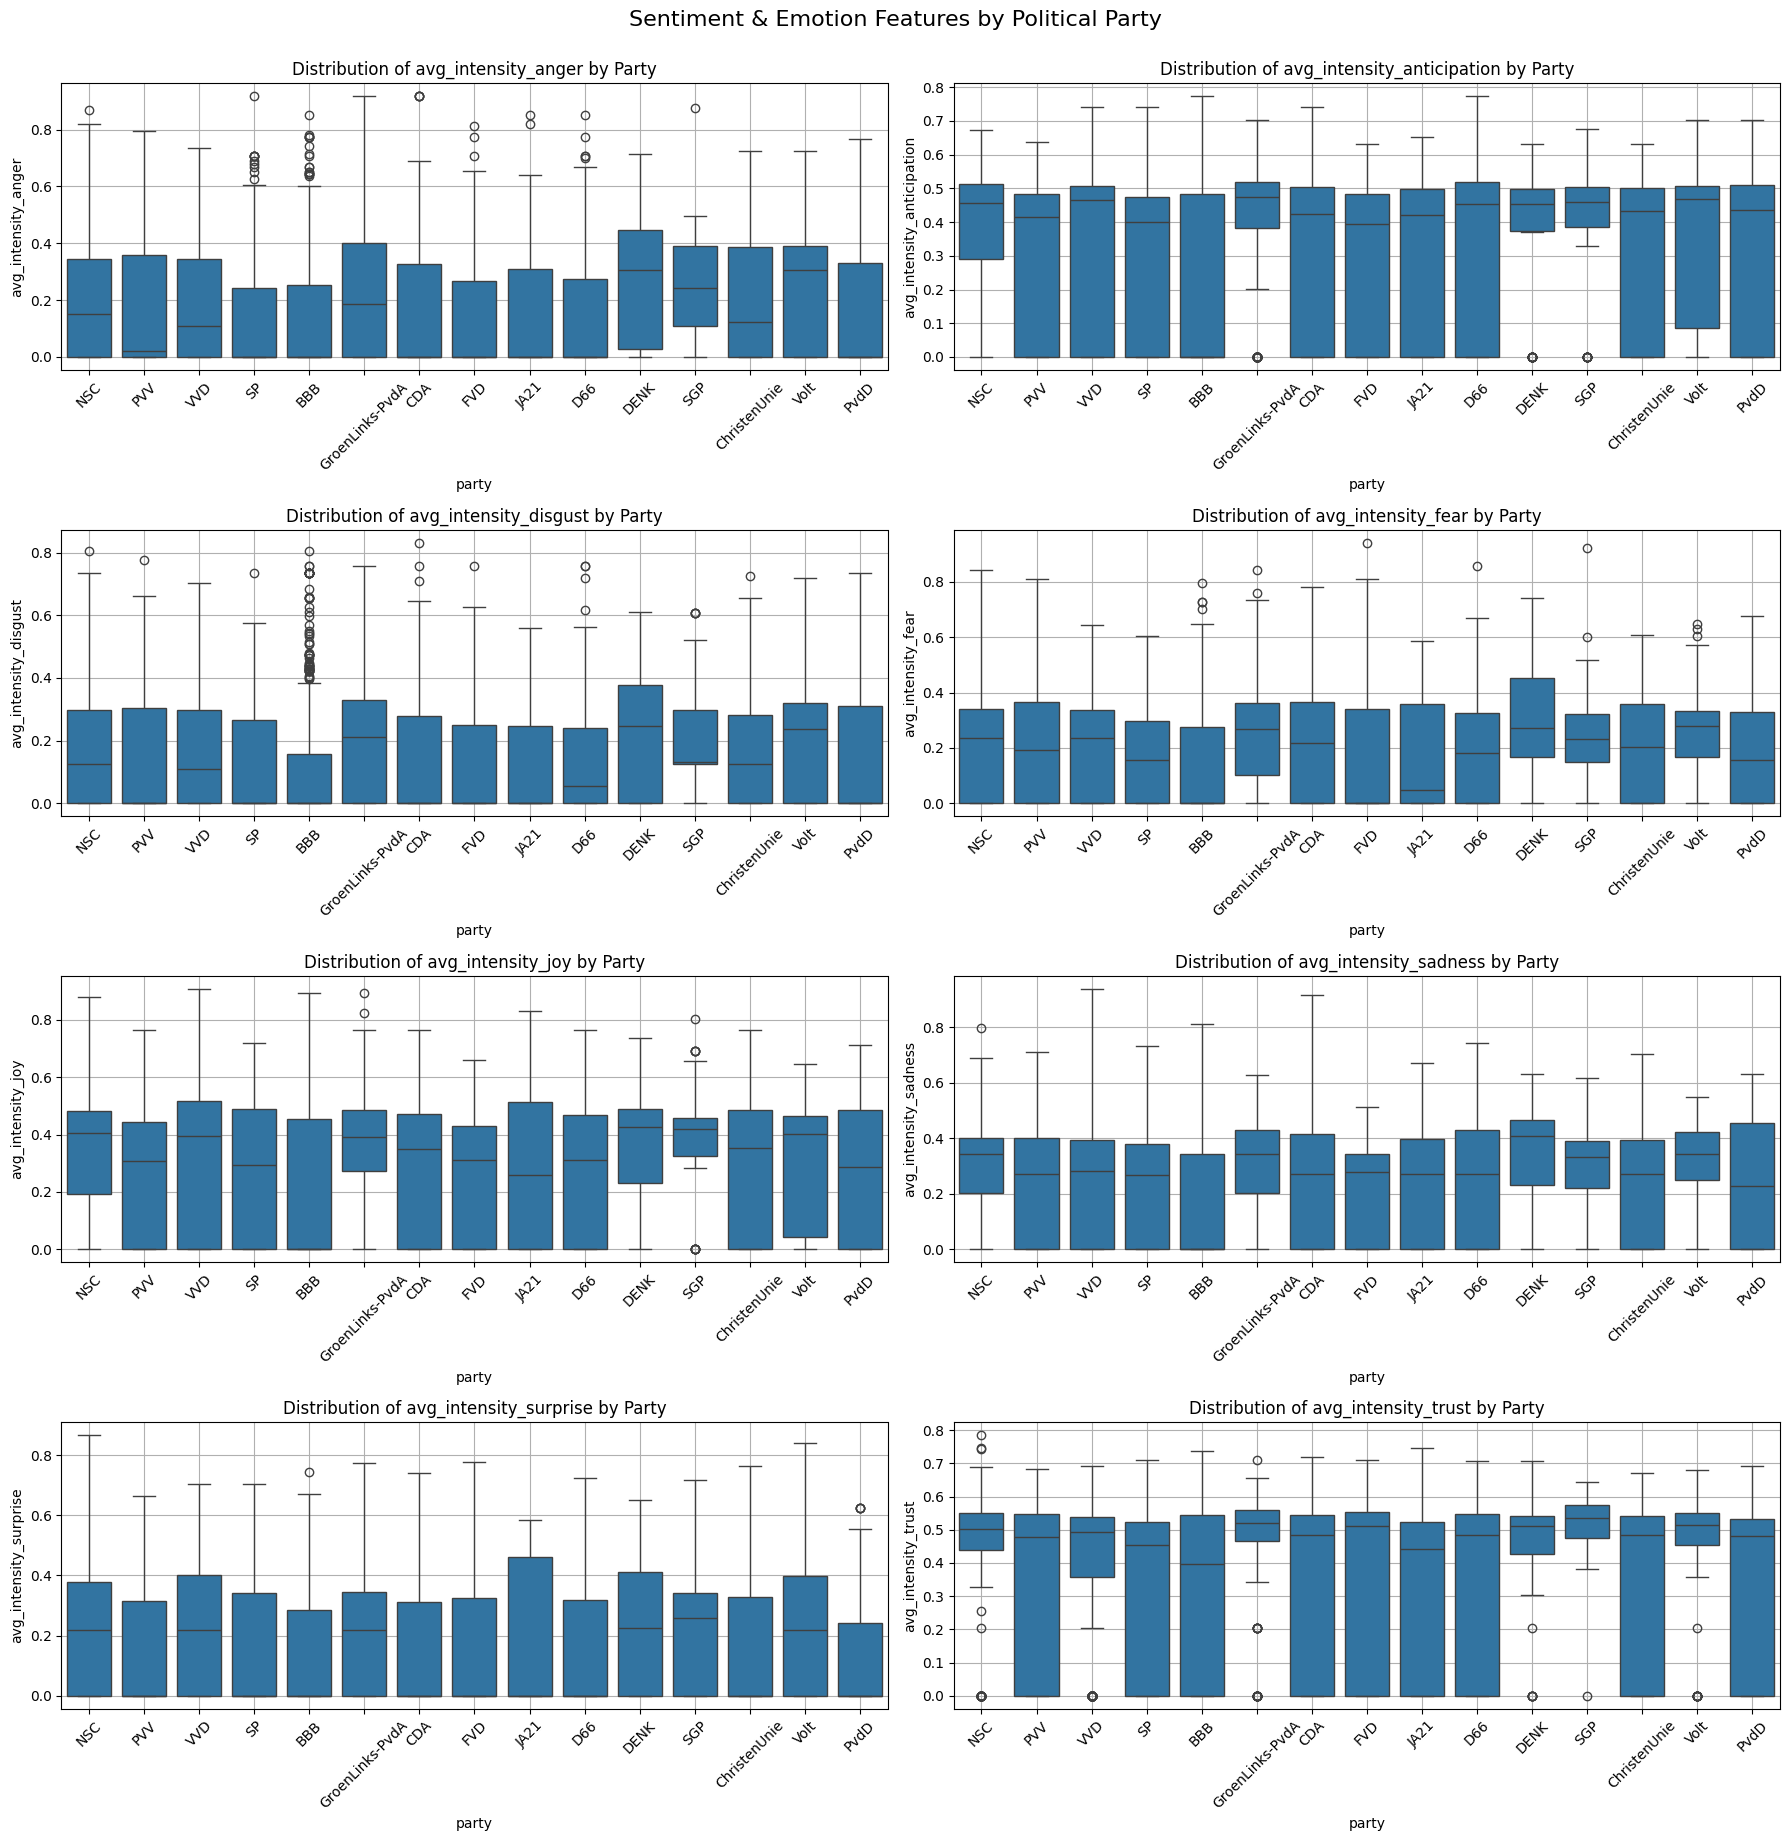

In [111]:
features = [
  'avg_intensity_anger',
 'avg_intensity_anticipation',
 'avg_intensity_disgust',
 'avg_intensity_fear',
 'avg_intensity_joy',
 'avg_intensity_sadness',
 'avg_intensity_surprise',
 'avg_intensity_trust'
]

df_filtered = df_merged.dropna(subset=["party"] + features)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(data=df_filtered, x="party", y=feature, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature} by Party", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

plt.tight_layout()
plt.suptitle("Sentiment & Emotion Features by Political Party", fontsize=16, y=1.02)
plt.show()


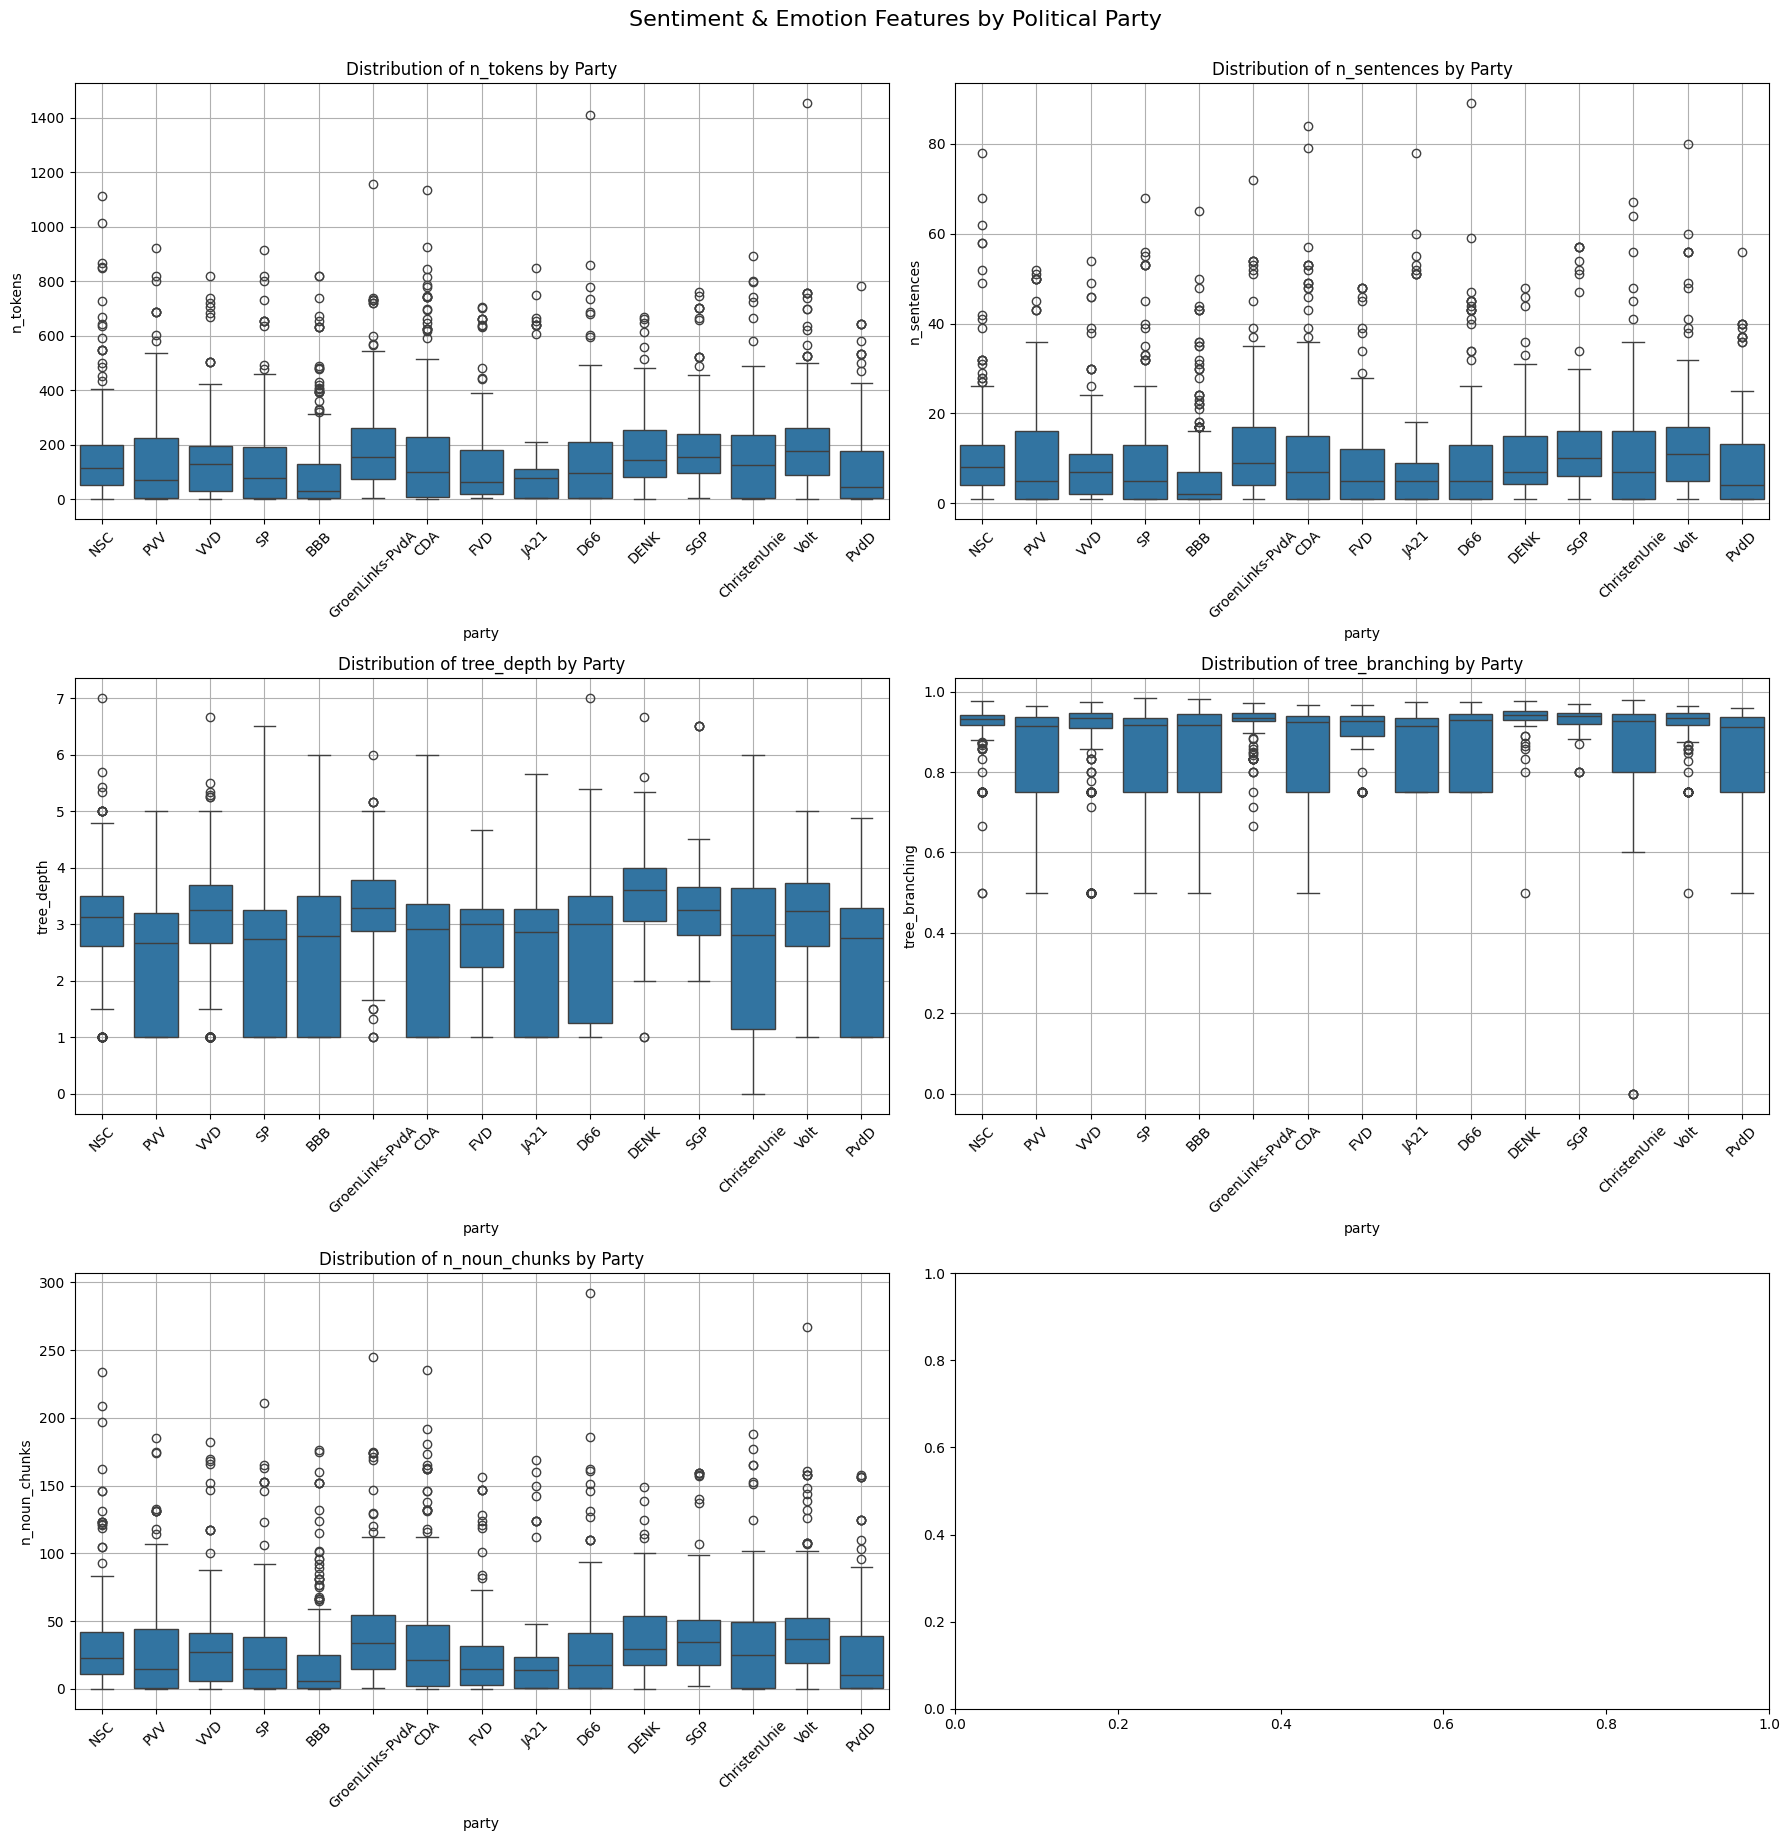

In [112]:
features = [
"n_tokens", "n_sentences", "tree_depth", "tree_branching", "n_noun_chunks"]

df_filtered = df_merged.dropna(subset=["party"] + features)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(data=df_filtered, x="party", y=feature, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature} by Party", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

plt.tight_layout()
plt.suptitle("Sentiment & Emotion Features by Political Party", fontsize=16, y=1.02)
plt.show()


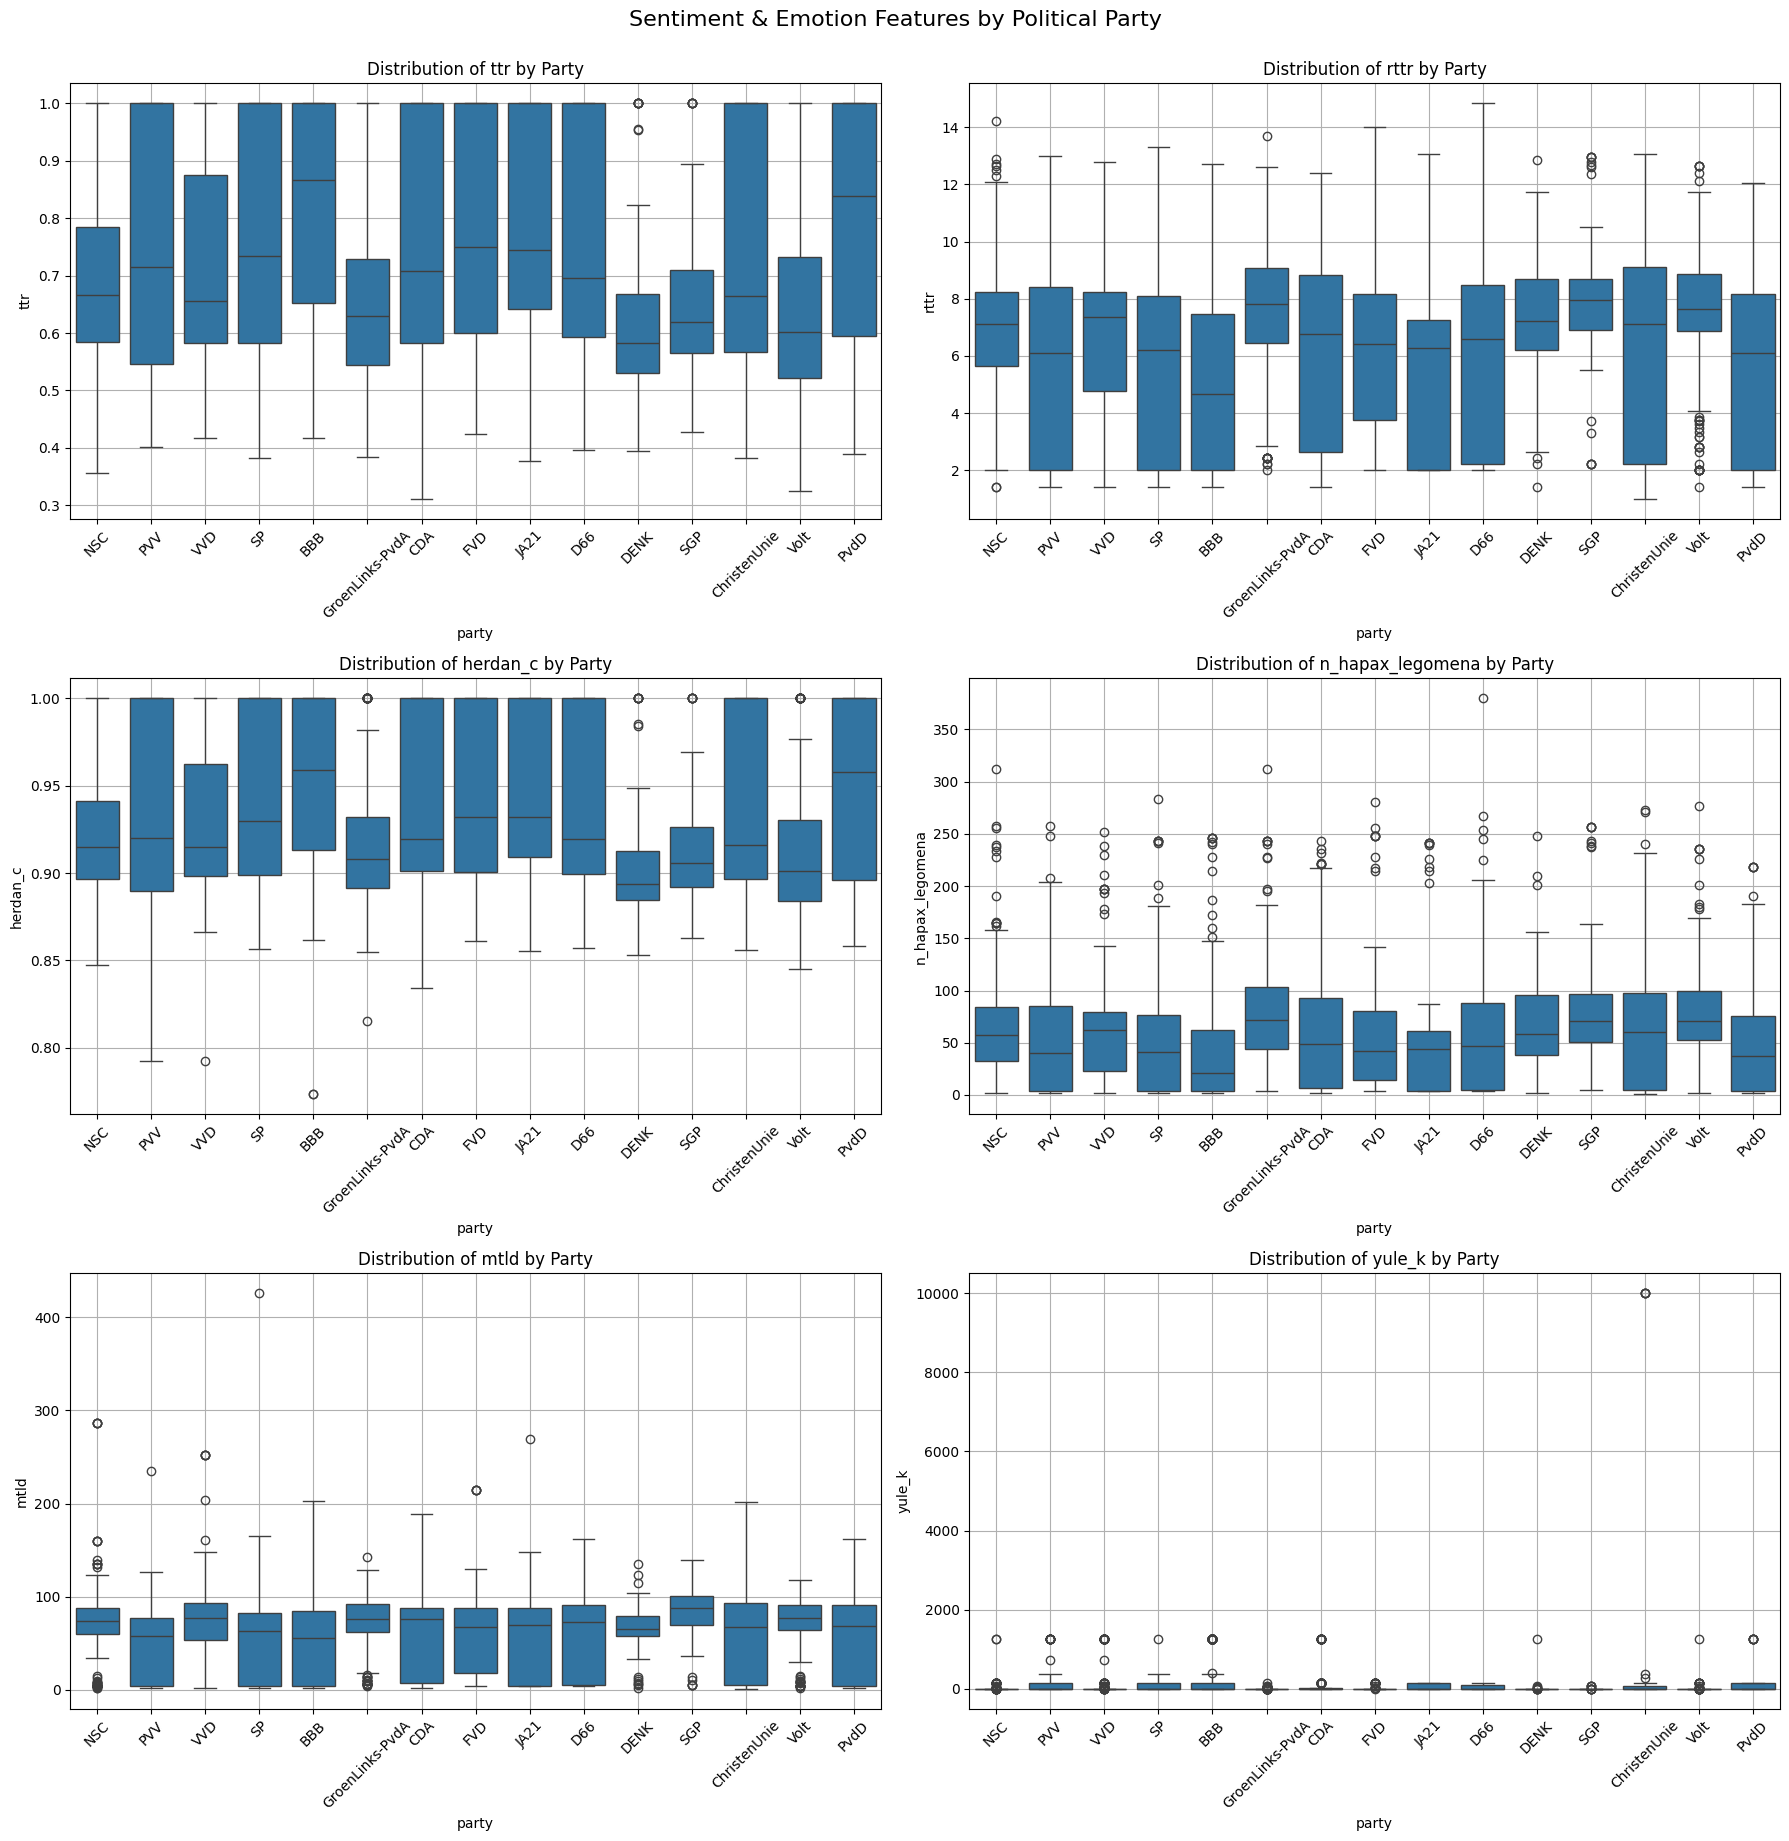

In [113]:
features = ["ttr", "rttr", "herdan_c", "n_hapax_legomena", "mtld", "yule_k"]

df_filtered = df_merged.dropna(subset=["party"] + features)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(data=df_filtered, x="party", y=feature, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature} by Party", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

plt.tight_layout()
plt.suptitle("Sentiment & Emotion Features by Political Party", fontsize=16, y=1.02)
plt.show()


| Party               | Characteristics                                                           |
| ------------------- | ------------------------------------------------------------------------- |
| **Volt**            | High trust, positive sentiment, lexical diversity, polite/complex speech. |
| **PvdD**            | Emotionally rich, positive tone, very high lexical sophistication.        |
| **ChristenUnie**    | High trust, rich vocabulary, complex structure, low negativity.           |
| **SGP**             | Lexically complex, emotionally restrained.                                |
| **DENK**            | High anger/fear, moderate lexical range, assertive tone.                  |
| **JA21**            | High dominance/anger, shorter, simpler structure.                         |
| **BBB**             | Emotionally intense (anger/disgust), lexically simple.                    |
| **PVV**             | High negative sentiment, low complexity, confrontational tone.            |
| **FVD**             | High anger and negativity, low lexical richness.                          |
| **GroenLinks-PvdA** | More sadness, lower valence, mid-complexity.                              |
| **D66**             | Sadness, complex structure, syntactic variation.                          |
| **NSC**             | Positive sentiment, average across features.                              |
| **SP**              | Simpler lexically, emotionally flat.                                      |
| **VVD**             | Neutral sentiment, mid-range in all features.                             |
| **CDA**             | Positive trust, mid-level arousal, somewhat rich language.                |


## Mapping emotions to leanings

In [124]:
import pandas as pd
import plotly.express as px
def convert_grey_to_hex(color):
    if isinstance(color, str) and color.startswith("grey"):
        grey_value = int(color[4:])
        rgb_val = int(255 * grey_value / 100)
        return f'rgb({rgb_val},{rgb_val},{rgb_val})'
    return color

data_parties = pd.DataFrame({
    "party": ["VVD", "D66", "GroenLinks-PvdA", "PVV", "CDA", "SP", "FVD", "PvdD",
              "ChristenUnie", "Volt", "JA21", "SGP", "DENK", "50PLUS", "BBB", "BIJ1", "BVNL", "NSC"],
    "leftright": [50, -5, -55, 9, 23, -77, 64, -95,
                  -32, -14, 77, 27, -68, -23, 9, -95, 100, -9],
    "progcon": [-32, 58, 66, -74, -24, 21, -92, 82,
                21, 84, -89, -42, 32, -3, -42, 92, -89, -8],
    "color": ["#EE6F2D", "#4DAA4F", "#CD3029", "grey92", "#62C45D", "#DA3732", "#9B2820", "#317142",
              "#46A4E2", "#4A2975", "#242C54", "#DA632C", "#50B4B1", "#8C3D83", "#9DBD43", "#FFFD54", "#1D2540", "#121439"]
})

data_parties["color"] = data_parties["color"].apply(convert_grey_to_hex)

fig = px.scatter(
    data_parties,
    x="leftright",
    y="progcon",
    text="party",
    color="party",
    color_discrete_map={row["party"]: row["color"] for _, row in data_parties.iterrows()},
    title="Dutch Political Compass based on KiesKompas",
    labels={
        "leftright": "Left (-100) ↔ Right (+100)",
        "progcon": "Conservative (-100) ↔ Progressive (+100)"
    },
    width=800,
    height=700
)

fig.update_traces(marker=dict(size=18), textposition='top center', textfont=dict(size=12, color="black"))
fig.update_layout(showlegend=False)
fig.show()


In [125]:
import pandas as pd

emotion_features = [
    'avg_intensity_anger',
    'avg_intensity_anticipation',
    'avg_intensity_disgust',
    'avg_intensity_fear',
    'avg_intensity_joy',
    'avg_intensity_sadness',
    'avg_intensity_surprise',
    'avg_intensity_trust',
    "sentiment_score",
    "n_positive_sentiment",
    "n_negative_sentiment",
    "avg_valence",
    "avg_arousal",
    "avg_dominance"
]

linguistic_features = [
    "n_tokens", "n_sentences", "tree_depth", "tree_branching", "n_noun_chunks",
    "ttr", "rttr", "herdan_c", "n_hapax_legomena", "mtld", "yule_k"
]

party_emotion_profile = df_merged.groupby("party")[emotion_features].mean().reset_index()




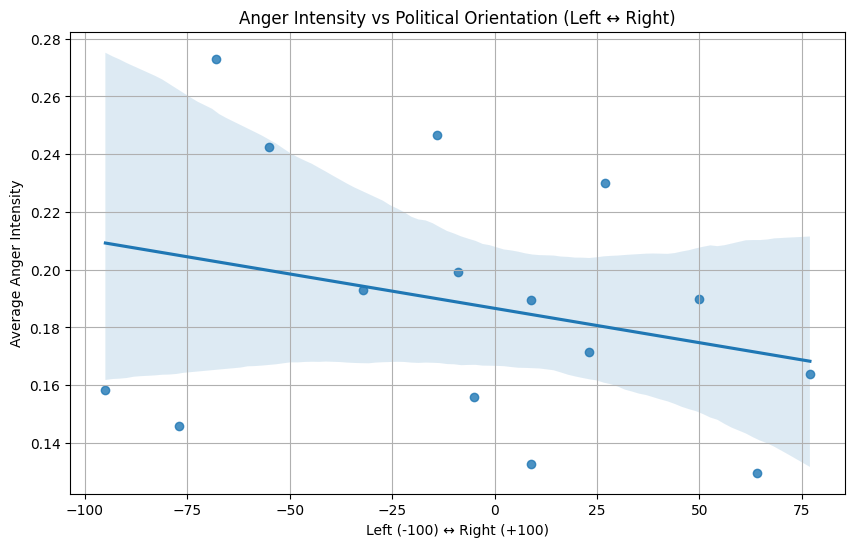

In [126]:

df_party_emotions = party_emotion_profile.merge(data_parties[['party', 'leftright', 'progcon']], on='party', how='left')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df_party_emotions, x="leftright", y="avg_intensity_anger")
plt.title("Anger Intensity vs Political Orientation (Left ↔ Right)")
plt.xlabel("Left (-100) ↔ Right (+100)")
plt.ylabel("Average Anger Intensity")
plt.grid(True)
plt.show()


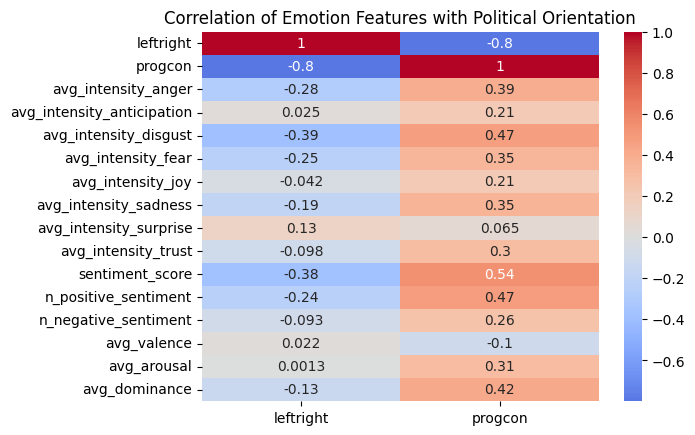

In [127]:
corr_df = df_party_emotions[["leftright", "progcon"] + emotion_features].corr()
sns.heatmap(corr_df[["leftright", "progcon"]], annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Emotion Features with Political Orientation")
plt.show()


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(df_party_emotions[emotion_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df_party_emotions["emotion_cluster"] = kmeans.fit_predict(X)

import plotly.express as px

fig = px.scatter(df_party_emotions, x="leftright", y="progcon", color="emotion_cluster",
                 text="party", title="Political Compass Colored by Emotional Style (KMeans)")
fig.update_traces(marker=dict(size=18), textposition="top center")
fig.show()


In [130]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Extract political and emotional coordinates
political_coords = df_party_emotions[["leftright", "progcon"]].values
emotional_coords = df_party_emotions[emotion_features].values
parties = df_party_emotions["party"].values
nan_rows = df_party_emotions[df_party_emotions[['leftright', 'progcon'] + emotion_features].isna().any(axis=1)]

print("Rows with NaNs:\n", nan_rows[['party', 'leftright', 'progcon'] + emotion_features])

political_dist = pd.DataFrame(euclidean_distances(political_coords), index=parties, columns=parties)
emotional_dist = pd.DataFrame(euclidean_distances(emotional_coords), index=parties, columns=parties)

political_dist_long = political_dist.stack().reset_index()
emotional_dist_long = emotional_dist.stack().reset_index()

political_dist_long.columns = ["party1", "party2", "political_distance"]
emotional_dist_long.columns = ["party1", "party2", "emotional_distance"]

distance_df = pd.merge(political_dist_long, emotional_dist_long, on=["party1", "party2"])
distance_df = distance_df[distance_df["party1"] != distance_df["party2"]]

distance_df["divergence_score"] = distance_df["emotional_distance"] - distance_df["political_distance"]

# Show top divergent and convergent pairs
distance_df.sort_values("divergence_score", ascending=False).head(20), "Emotionally Divergent But Politically Close (Top 20)"

distance_df.sort_values("divergence_score").head(20), "Emotionally Aligned But Politically Distant (Top 20)"

Rows with NaNs:
 Empty DataFrame
Columns: [party, leftright, progcon, avg_intensity_anger, avg_intensity_anticipation, avg_intensity_disgust, avg_intensity_fear, avg_intensity_joy, avg_intensity_sadness, avg_intensity_surprise, avg_intensity_trust, sentiment_score, n_positive_sentiment, n_negative_sentiment, avg_valence, avg_arousal, avg_dominance]
Index: []


(              party1           party2  political_distance  emotional_distance  \
 115             JA21             PvdD          242.538657            1.462218   
 157             PvdD             JA21          242.538657            1.462218   
 155             PvdD              FVD          235.705325            0.697701   
 85               FVD             PvdD          235.705325            0.697701   
 97   GroenLinks-PvdA             JA21          203.590275            5.400967   
 111             JA21  GroenLinks-PvdA          203.590275            5.400967   
 81               FVD  GroenLinks-PvdA          197.800404            4.937002   
 95   GroenLinks-PvdA              FVD          197.800404            4.937002   
 119             JA21             Volt          195.473783            6.645379   
 217             Volt             JA21          195.473783            6.645379   
 187               SP             JA21          189.251156            1.687567   
 117            

In [ ]:

warnings.filterwarnings("ignore")

df = df_merged.copy()

features = [
    'sentiment_score', 'n_positive_sentiment', 'n_negative_sentiment',
    'avg_valence', 'avg_arousal', 'avg_dominance',
    'avg_intensity_anger', 'avg_intensity_anticipation', 'avg_intensity_disgust',
    'avg_intensity_fear', 'avg_intensity_joy', 'avg_intensity_sadness',
    'avg_intensity_surprise', 'avg_intensity_trust',
    'n_tokens', 'n_sentences', 'tree_depth', 'tree_branching', 'n_noun_chunks',
    'ttr', 'rttr', 'herdan_c', 'n_hapax_legomena', 'mtld', 'yule_k'
]

df_clean = df.dropna(subset=['party'] + features)

results = []
for feature in features:
    groups = [group[feature].dropna().values for name, group in df_clean.groupby('party')]
    stat, p_value = stats.kruskal(*groups)
    results.append({'feature': feature, 'H_statistic': stat, 'p_value': p_value})

results_df = pd.DataFrame(results).sort_values('p_value')
results_df



,feature,H_statistic,p_value
1,n_positive_sentiment,262.063031,9.137980e-48
18,n_noun_chunks,261.991080,9.457239e-48
17,tree_branching,259.336434,3.356492e-47
14,n_tokens,248.730195,5.261082e-45
16,tree_depth,247.355361,1.012264e-44
22,n_hapax_legomena,244.833445,3.360791e-44
20,rttr,240.001947,3.342680e-43
21,herdan_c,238.696323,6.216071e-43
19,ttr,238.615258,6.460136e-43
24,yule_k,237.779313,9.609466e-43


In [ ]:
df_merged.to_csv('df_merged.csv')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-36-2657364503.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['UMAP1'] = embedding[:, 0]
/tmp/ipython-input-36-2657364503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

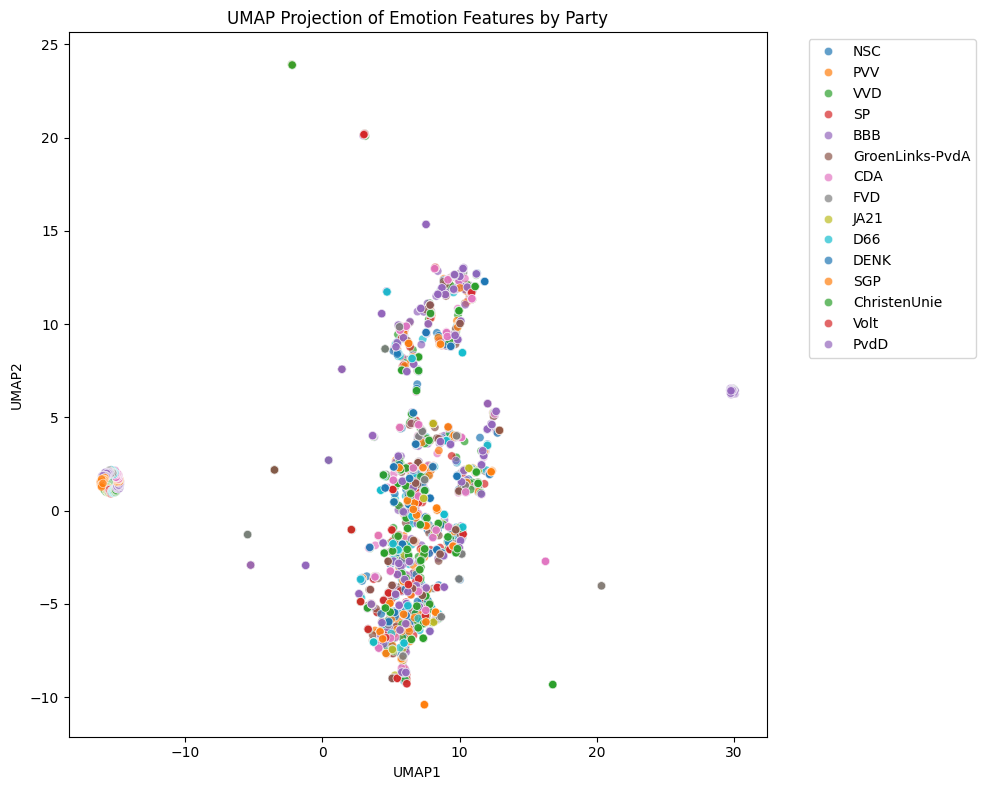

In [36]:
emotion_features = [
    'n_positive_sentiment', 'n_negative_sentiment',
    'avg_valence', 'avg_arousal', 'avg_dominance',
    'avg_intensity_anger', 'avg_intensity_anticipation', 'avg_intensity_disgust',
    'avg_intensity_fear', 'avg_intensity_joy', 'avg_intensity_sadness',
    'avg_intensity_surprise', 'avg_intensity_trust'
    # 'n_tokens', 'n_sentences', 'tree_depth', 'tree_branching','rttr'
]

df_clean = df_merged.dropna(subset=emotion_features + ['party'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[emotion_features])

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)


df_clean['UMAP1'] = embedding[:, 0]
df_clean['UMAP2'] = embedding[:, 1]


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='party', palette='tab10', alpha=0.7)
plt.title("UMAP Projection of Emotion Features by Party")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipython-input-37-2380198137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['HDBSCAN_cluster'] = hdb.fit_predict(embedding)
/tmp/ipython-input-37-2380198137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

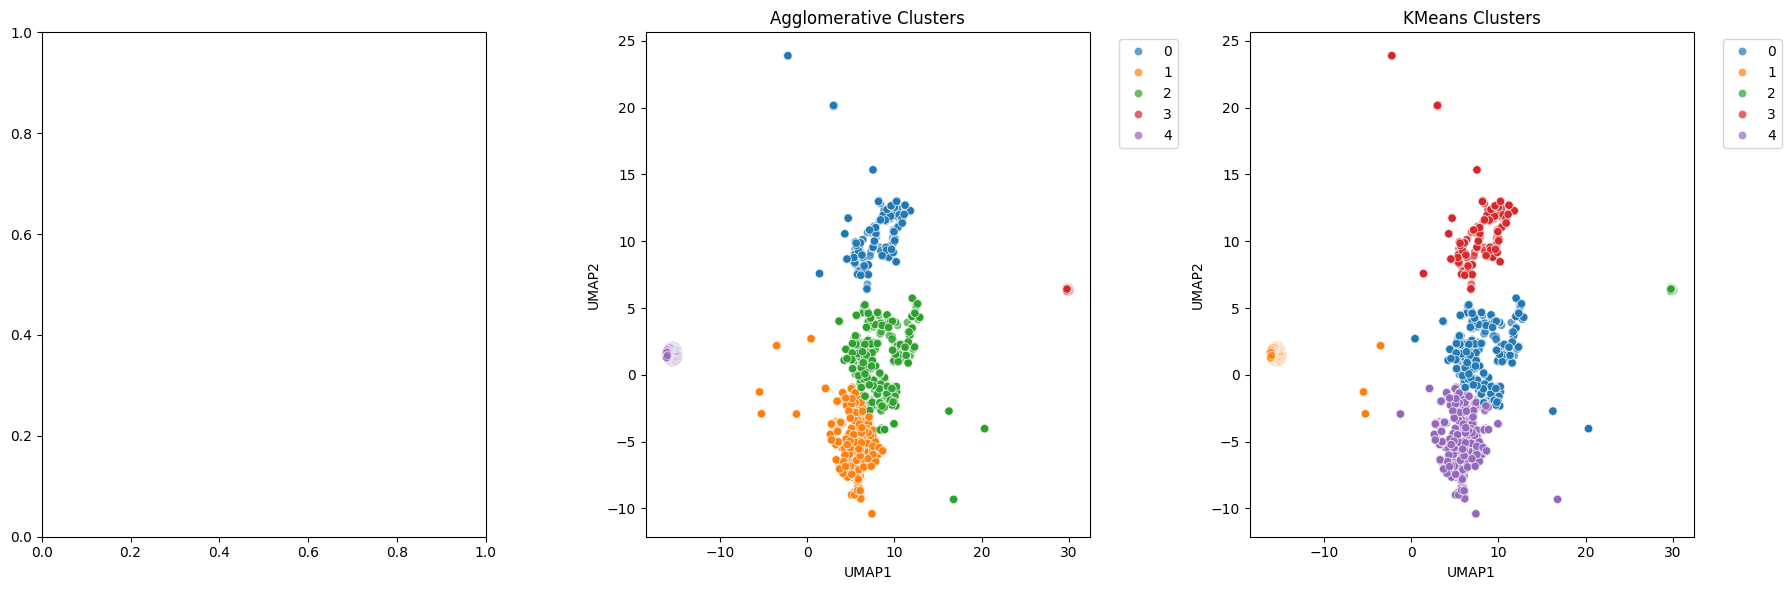

In [37]:
import hdbscan
from sklearn.cluster import AgglomerativeClustering, KMeans

hdb = hdbscan.HDBSCAN(min_cluster_size=15)
df_clean['HDBSCAN_cluster'] = hdb.fit_predict(embedding)

agglo = AgglomerativeClustering(n_clusters=5)
df_clean['Agglomerative_cluster'] = agglo.fit_predict(embedding)

kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['KMeans_cluster'] = kmeans.fit_predict(embedding)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='HDBSCAN_cluster', palette='tab10', alpha=0.7, ax=axes[0])
# axes[0].set_title("HDBSCAN Clusters")
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='Agglomerative_cluster', palette='tab10', alpha=0.7, ax=axes[1])
axes[1].set_title("Agglomerative Clusters")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='KMeans_cluster', palette='tab10', alpha=0.7, ax=axes[2])
axes[2].set_title("KMeans Clusters")
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In this case kmeans and agglomerative give the same results

In [38]:
df_clean['KMeans_cluster'].value_counts()


,count
KMeans_cluster,
4,1159
0,1147
3,683
1,528
2,136


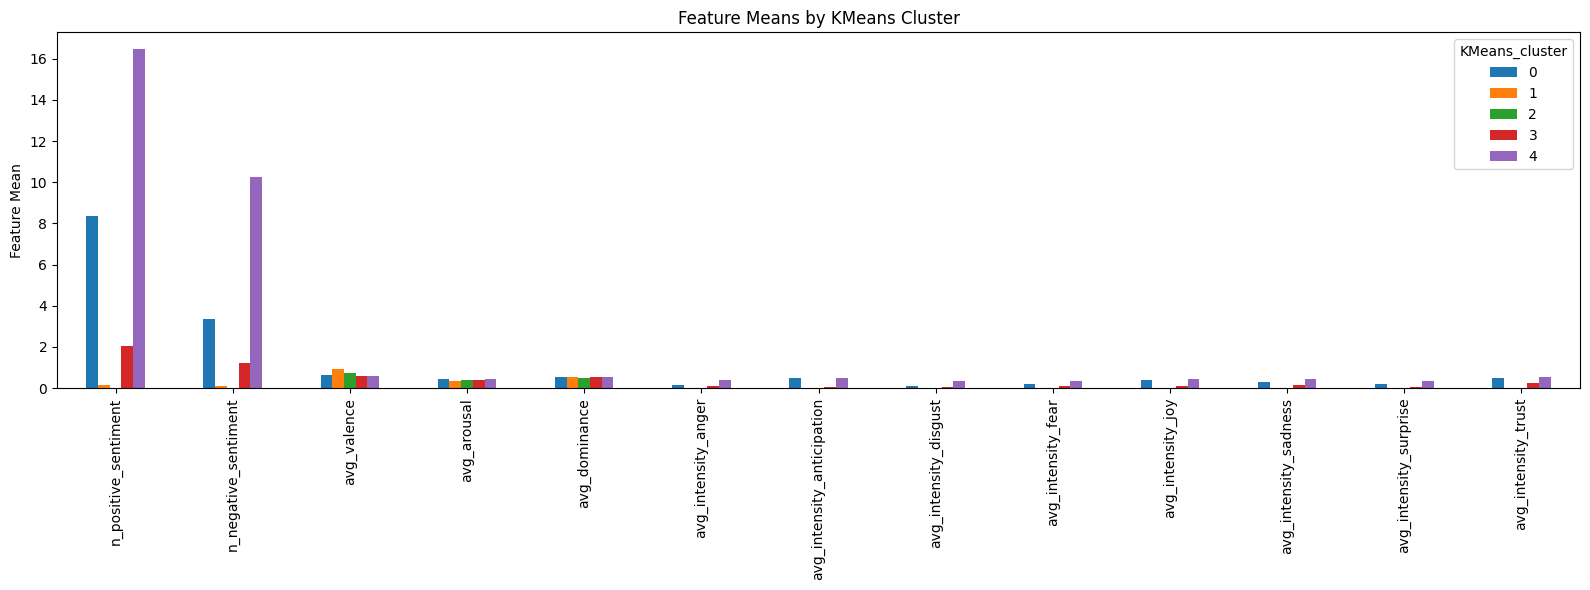

In [ ]:
cluster_means = df_clean.groupby('KMeans_cluster')[emotion_features].mean()
cluster_means.T.plot(kind='bar', figsize=(16, 6), title='Feature Means by KMeans Cluster')
plt.ylabel("Feature Mean")
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Normalized Feature Means by Cluster'}>

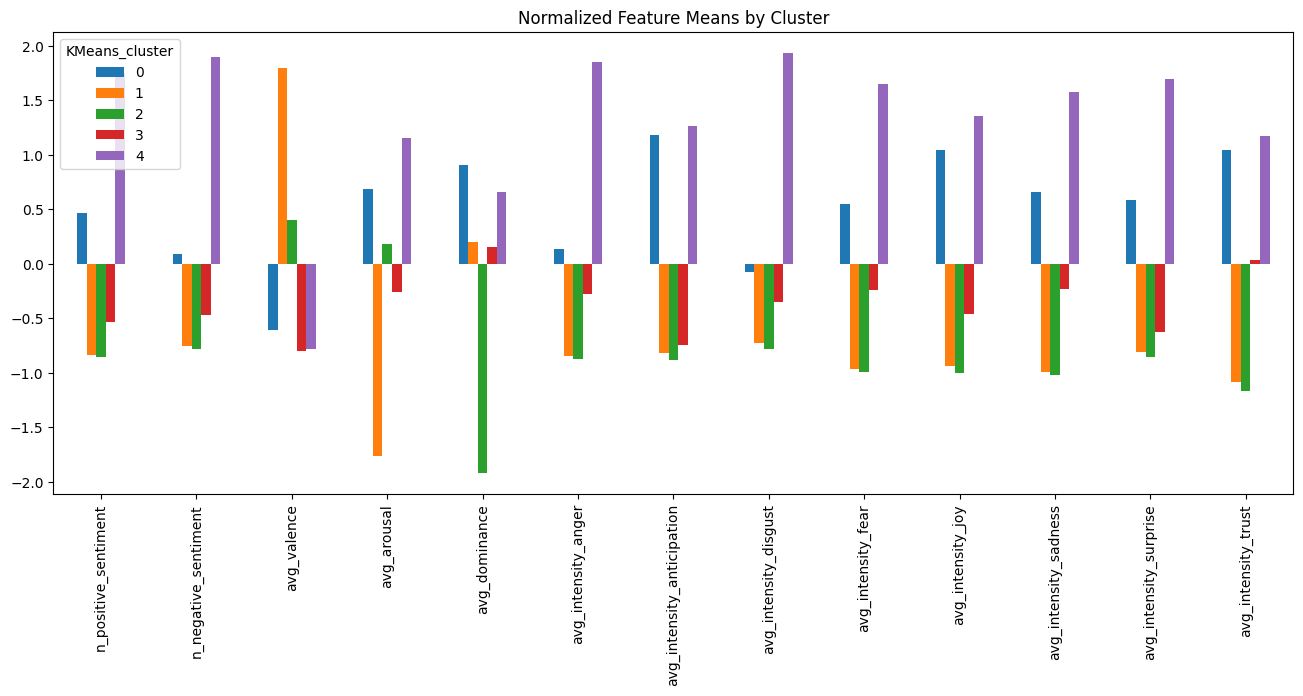

In [ ]:
from sklearn.preprocessing import StandardScaler

cluster_means_scaled = pd.DataFrame(
    StandardScaler().fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)
cluster_means_scaled.T.plot(kind='bar', figsize=(16, 6), title='Normalized Feature Means by Cluster')


Text(0.5, 1.0, 'Party Distribution Across KMeans Clusters')

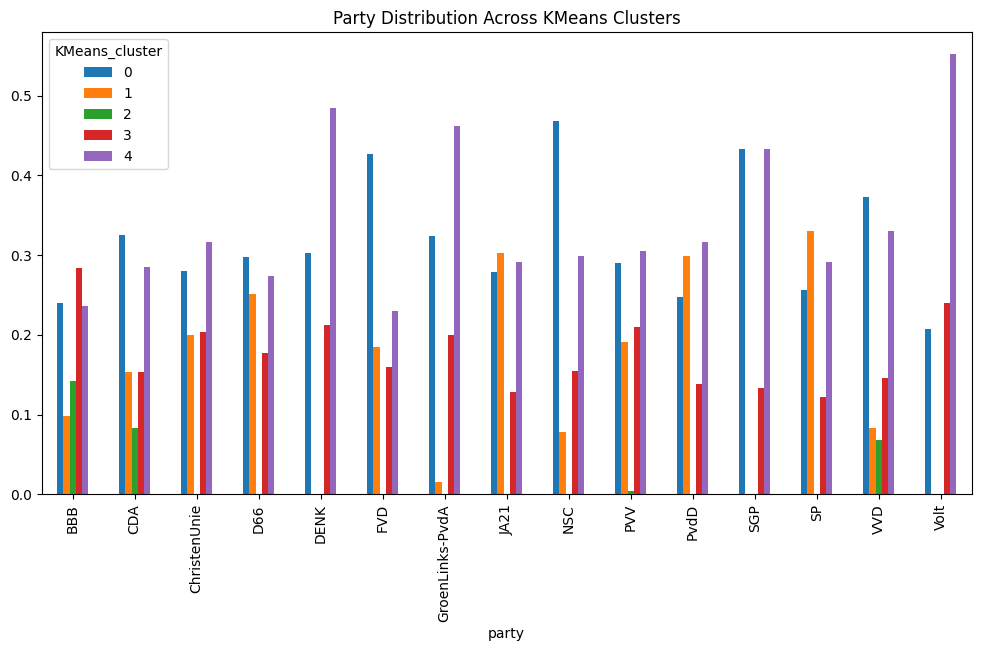

In [ ]:
pd.crosstab(df_clean['party'], df_clean['KMeans_cluster'], normalize='index').plot(kind='bar', figsize=(12, 6))
plt.title("Party Distribution Across KMeans Clusters")


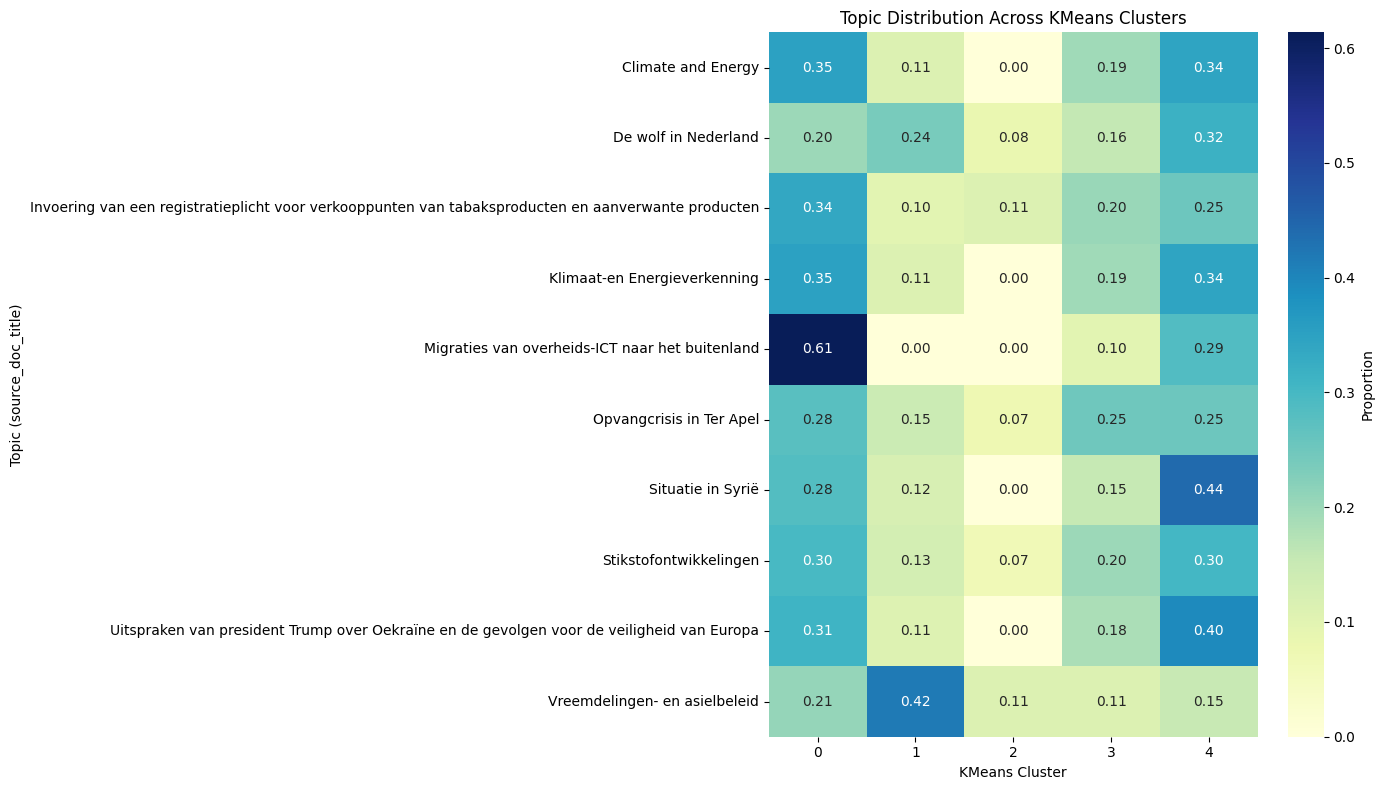

In [ ]:
topic_cluster_crosstab = pd.crosstab(df_clean['source_doc_title'], df_clean['KMeans_cluster'], normalize='index')

plt.figure(figsize=(14, 8))
sns.heatmap(topic_cluster_crosstab, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title("Topic Distribution Across KMeans Clusters")
plt.xlabel("KMeans Cluster")
plt.ylabel("Topic (source_doc_title)")
plt.tight_layout()
plt.show()


In [ ]:
## Merging on metaclusters

## Merging on metaclusters

In [27]:

final_meta_path = "/content/final_meta_clusters - final_meta_clusters.csv"
df_meta = pd.read_csv(final_meta_path)

df_merged_filtered = df_merged.merge(df_meta, on="utterance", how="inner")


In [31]:
df_merged_filtered

,Unnamed: 0_x,speaker_x,party_x,utterance,n_utterance,n_utterances,source_doc_id,source_doc_title_x,Llama3_Code_x,Falcon_Code_x,...,party_y,source_doc_title_y,Model,Code_Type,UMAP_1,UMAP_2,HDBSCAN_Cluster,Label,MetaCluster,MetaCluster_Label
0,7430,De voorzitter,NaN,We gaan beginnen met de eerste termijn van de ...,2,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Start of parliamentary debate.<|eot_id|><|star...,We will begin by discussing the first term on ...,...,NaN,Invoering van een registratieplicht voor verko...,Mixtral,Topical,1.460130,2.391103,32,Criticizing Jansen's Policy Stance,10,Policy Effectiveness and Accountability
1,7431,Daniëlle Jansen,NSC,Voorzitter. Ik wil u eerst meenemen in een cas...,3,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"The main idea of this sentence is: ""Protecting...","""The Dutch government has announced that it wi...",...,NSC,Invoering van een registratieplicht voor verko...,Mixtral,Topical,1.305103,-8.204742,5,Protecting Youth From Nicotine,6,Public Health Policy Debates
2,7432,Crijns,PVV,Mevrouw Jansen heeft eigenlijk elke keer hetze...,4,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"""Mevrouw Jansen's speech"" or ""Registration of ...",The main idea of the sentence is that Mevrouw ...,...,PVV,Invoering van een registratieplicht voor verko...,Mixtral,Topical,1.469693,2.357732,32,Criticizing Jansen's Policy Stance,10,Policy Effectiveness and Accountability
3,7433,Daniëlle Jansen,NSC,Nieuw Sociaal Contract ziet de registratieplic...,5,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,Rookvrije generatie</assistant>: Rookvrije,The main idea of the sentence is that the regi...,...,NSC,Invoering van een registratieplicht voor verko...,Mixtral,Topical,1.915609,-8.347014,5,Protecting Youth From Nicotine,6,Public Health Policy Debates
4,7434,Crijns,PVV,"Dank u wel voor het antwoord, mevrouw Jansen. ...",6,281,nl.oorg10002.2b.2025.20242025-50-11.doc.1,Invoering van een registratieplicht voor verko...,"Welkom in de politieke discussie! Main idea: ""M",The main idea of the sentence is that the PVV ...,...,PVV,Invoering van een registratieplicht voor verko...,Mixtral,Topical,1.453238,2.305978,32,Criticizing Jansen's Policy Stance,10,Policy Effectiveness and Accountability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,484,Eerdmans,JA21,"Voorzitter, dank u wel. Respect voor de vijf b...",485,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,Main idea: The Dutch parliament (Kamer) declar...,The main idea of the sentence is that the Dutc...,...,JA21,Klimaat-en Energieverkenning,Mixtral,Topical,-3.980590,0.070428,22,Climate Policy and Competition,4,Climate and Energy Policy
1958,486,Eerdmans,JA21,"Dan de tweede motie. De Kamer, gehoord de be...",487,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,Stop Nationaal Klimaat Platform. </assistant><...,The main idea of the sentence is that the Dutc...,...,JA21,Klimaat-en Energieverkenning,Mixtral,Topical,-3.324717,-0.180774,26,Climate Policy and Energy,4,Climate and Energy Policy
1959,486,Eerdmans,JA21,"Dan de tweede motie. De Kamer, gehoord de be...",487,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,Stop Nationaal Klimaat Platform. </assistant><...,The main idea of the sentence is that the Dutc...,...,JA21,Klimaat-en Energieverkenning,Mixtral,Topical,-3.324717,-0.180774,26,Climate Policy and Energy,4,Climate and Energy Policy
1960,501,Bontenbal,CDA,Even over de motie op stuk nr. 1490 van colleg...,502,510,nl.oorg10002.2b.2025.20242025-61-8.doc.1,Climate and Energy,Main idea: The government is considering a mot...,Minister Hermans:In het kader van het Landelij...,...,CDA,Klimaat-en Energieverkenning,Mixtral,Topical,-3.181964,-0.120737,26,Climate Policy and Energy,4,Climate a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


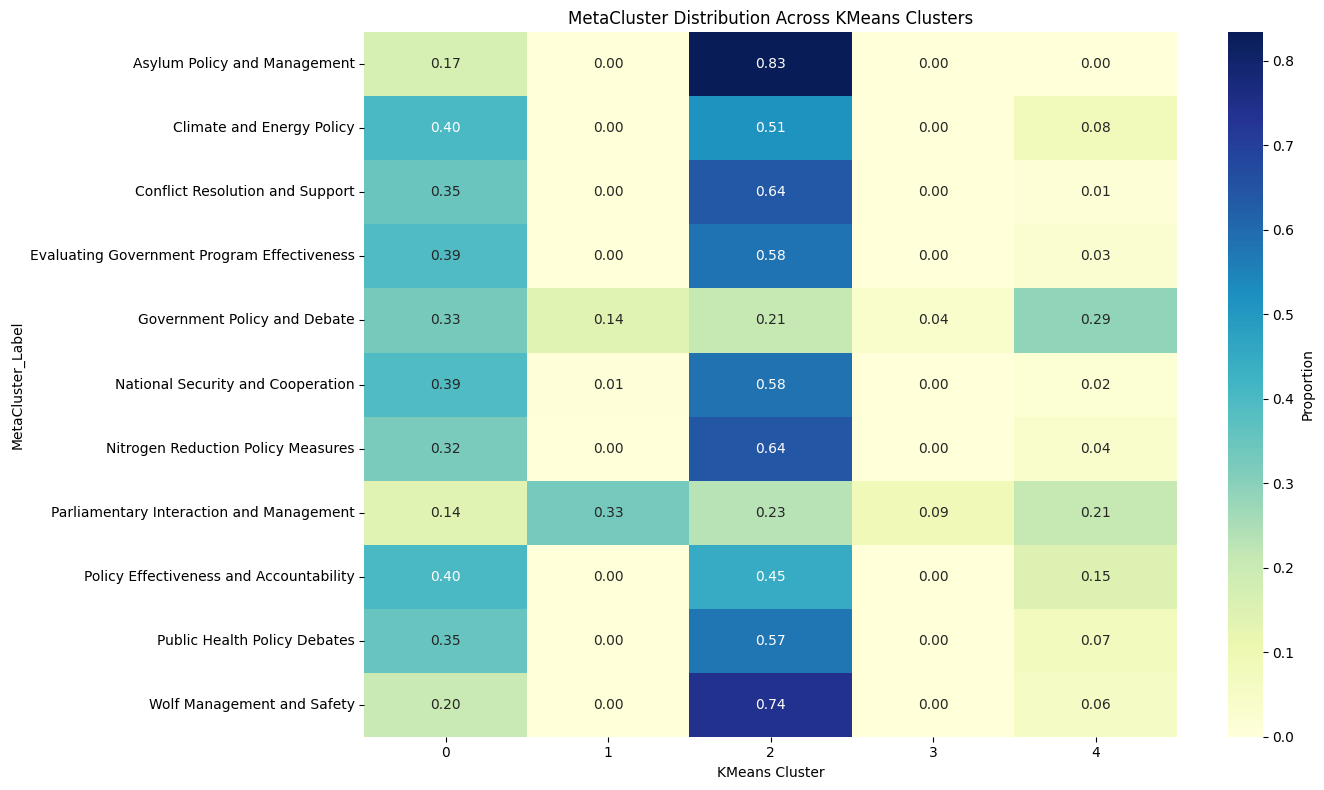

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import AgglomerativeClustering, KMeans
import hdbscan
import numpy as np

# Load the merged dataset
df = df_merged_filtered

# Drop rows with missing emotion features or MetaCluster_Label
emotion_features = [
    'n_positive_sentiment', 'n_negative_sentiment',
    'avg_valence', 'avg_arousal', 'avg_dominance',
    'avg_intensity_anger', 'avg_intensity_anticipation', 'avg_intensity_disgust',
    'avg_intensity_fear', 'avg_intensity_joy', 'avg_intensity_sadness',
    'avg_intensity_surprise', 'avg_intensity_trust',
    'n_tokens', 'n_sentences', 'tree_depth', 'rttr', 'n_hapax_legomena', 'n_org' , 'n_person'
]

df_clean = df.dropna(subset=emotion_features + ['MetaCluster_Label'])

# Scale the emotion features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[emotion_features])

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)
df_clean['UMAP1'] = embedding[:, 0]
df_clean['UMAP2'] = embedding[:, 1]

# Clustering
df_clean['HDBSCAN_cluster'] = hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(embedding)
df_clean['Agglomerative_cluster'] = AgglomerativeClustering(n_clusters=5).fit_predict(embedding)
df_clean['KMeans_cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(embedding)

# Crosstab of MetaCluster_Label vs. KMeans clusters
topic_cluster_crosstab = pd.crosstab(df_clean['MetaCluster_Label'], df_clean['KMeans_cluster'], normalize='index')

plt.figure(figsize=(14, 8))
sns.heatmap(topic_cluster_crosstab, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title("MetaCluster Distribution Across KMeans Clusters")
plt.xlabel("KMeans Cluster")
plt.ylabel("MetaCluster_Label")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


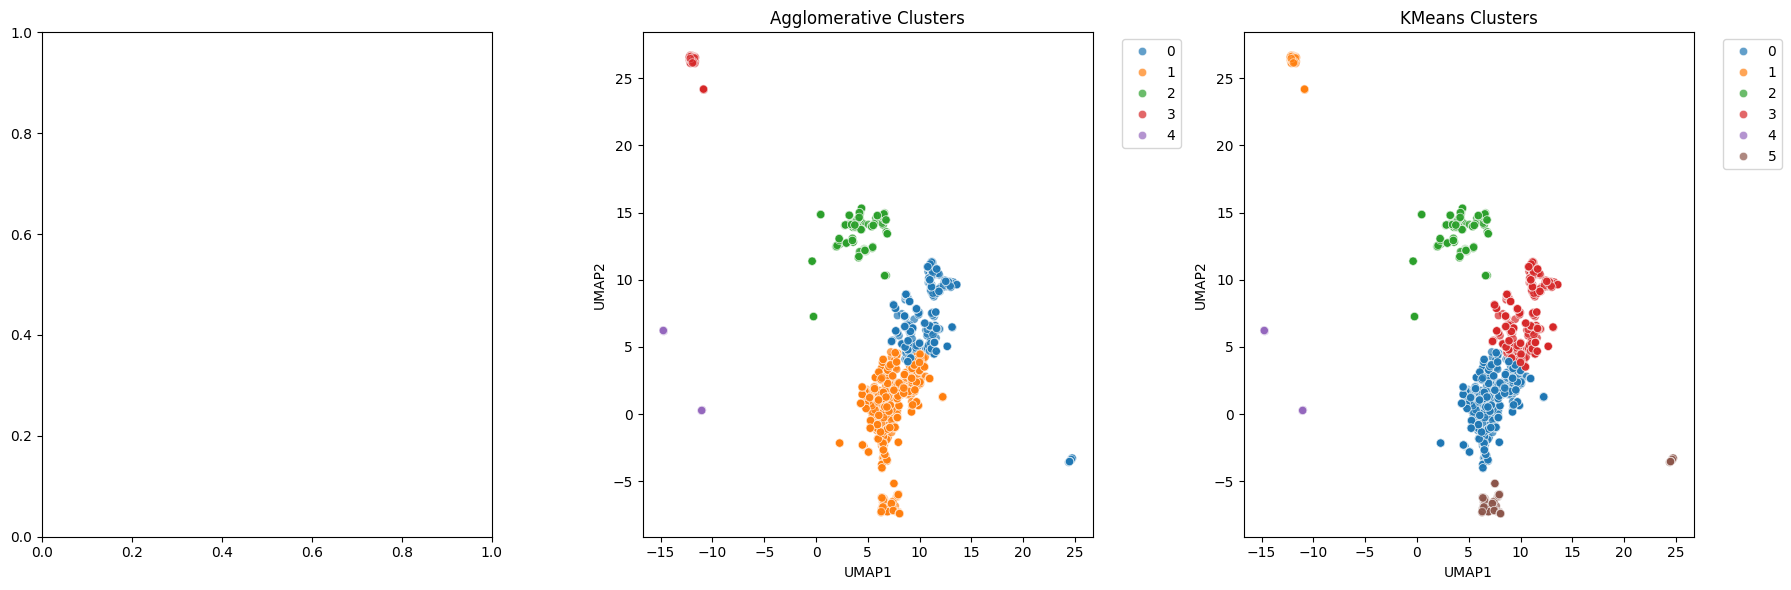

In [90]:
import hdbscan
from sklearn.cluster import AgglomerativeClustering, KMeans

hdb = hdbscan.HDBSCAN(min_cluster_size=15)
df_clean['HDBSCAN_cluster'] = hdb.fit_predict(embedding)

agglo = AgglomerativeClustering(n_clusters=5)
df_clean['Agglomerative_cluster'] = agglo.fit_predict(embedding)

kmeans = KMeans(n_clusters=6, random_state=100)
df_clean['KMeans_cluster'] = kmeans.fit_predict(embedding)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='Agglomerative_cluster', palette='tab10', alpha=0.7, ax=axes[1])
axes[1].set_title("Agglomerative Clusters")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(data=df_clean, x='UMAP1', y='UMAP2', hue='KMeans_cluster', palette='tab10', alpha=0.7, ax=axes[2])
axes[2].set_title("KMeans Clusters")
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



<Axes: xlabel='UMAP1', ylabel='UMAP2'>

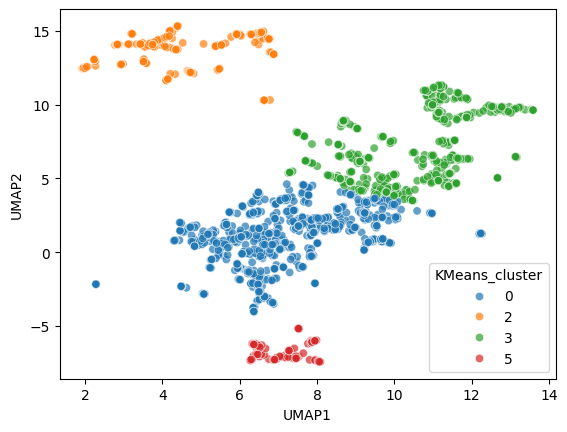

In [91]:
from scipy.stats import zscore

df_no_outliers = df_clean[
    (df_clean['UMAP1'] > 1) & (df_clean['UMAP1'] < 20) &
    (df_clean['UMAP2'] > -10) & (df_clean['UMAP2'] < 20)
]

sns.scatterplot(data=df_no_outliers, x='UMAP1', y='UMAP2', hue='KMeans_cluster', palette='tab10', alpha=0.7)


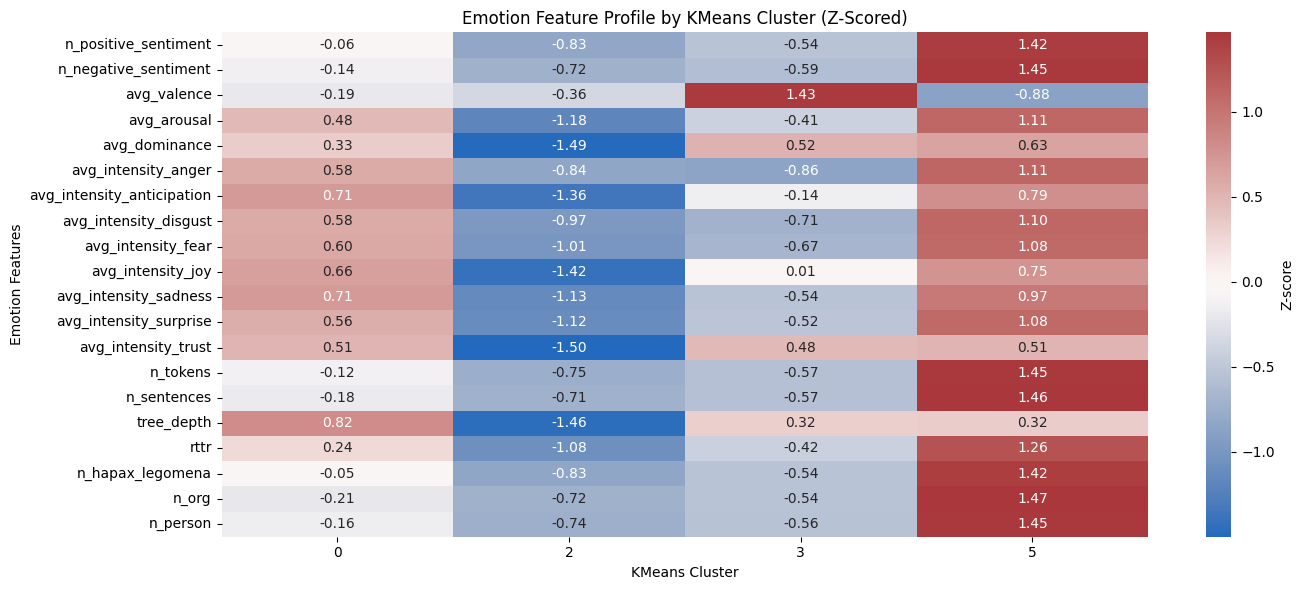

In [93]:
cluster_means = df_no_outliers.groupby('KMeans_cluster')[emotion_features].mean()

cluster_means_norm = (cluster_means - cluster_means.mean()) / cluster_means.std()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means_norm.T, cmap='vlag', annot=True, fmt=".2f", cbar_kws={'label': 'Z-score'})
plt.title("Emotion Feature Profile by KMeans Cluster (Z-Scored)")
plt.xlabel("KMeans Cluster")
plt.ylabel("Emotion Features")
plt.tight_layout()
plt.show()




KMeans Cluster 0

– Ik vind dat totaal niet handig, want ik krijg gewoon beelden van vissers die laten zien dat die windmolens bij een behoorlijke wind allemaal stilstaan op dat moment, terwijl we ze gebouwd hebben voor het moment dat er veel wind is. Dus dan gaat er iets gruwelijk mis in ons systeem. Ik ben er veel meer voor dat de energie wordt opgewekt op de plek waar je die nodig hebt. Dat is ook wat de grote techgiganten op dit moment doen, door gewoon bij hun datacenters al SMA's in te plannen en daar investeringen in te doen. Van mijn, toen nog, Tweede Kamercollega Gijs Tuinman heb ik destijds het volgende geleerd. Hij zei: wij moeten er feitelijk voor zorgen dat wij onze energievoorziening veel lokaler maken en niet één groot grid hebben, waarbij, als er op één plek iets uitvalt, het hele stroomnetwerk kapot is, zoals hij zag in Oost-Oekraïne. Wij moeten dat veel meer lokaal gaan opwekken, waar we het ook verbruiken. Waar wij het opwekken maar niet kunnen verbruiken, moeten e

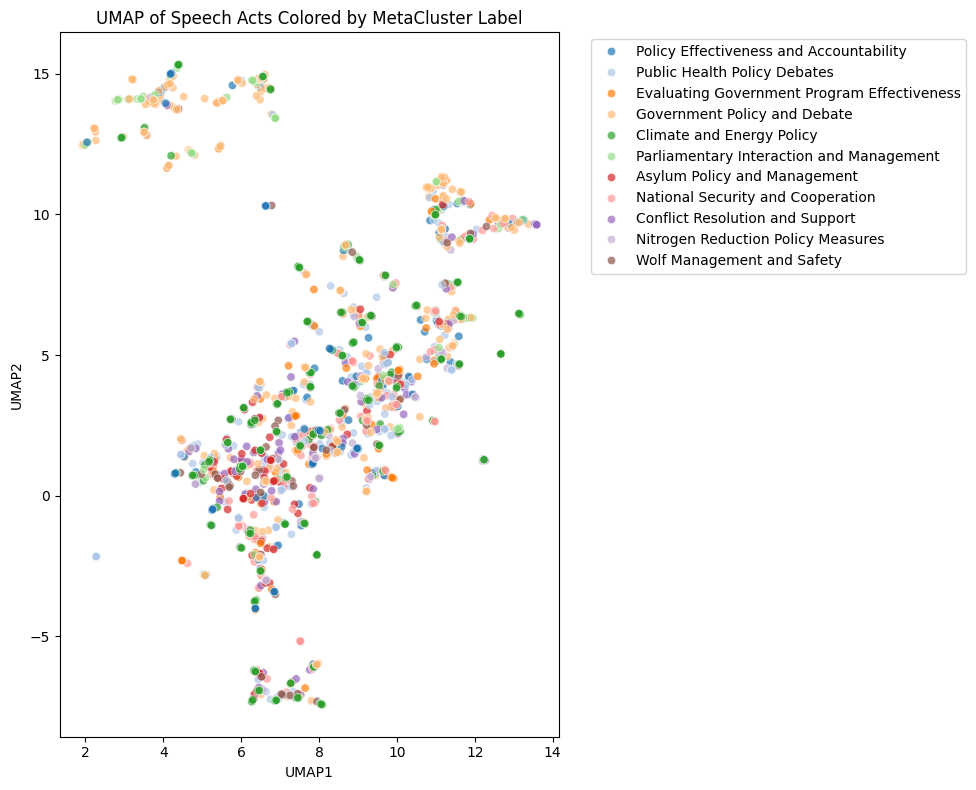

In [132]:
pd.crosstab(df_no_outliers['MetaCluster_Label'], df_no_outliers['KMeans_cluster'], normalize='columns')
for cluster in sorted(df_no_outliers['KMeans_cluster'].unique()):
    print(f"\n\nKMeans Cluster {cluster}\n")
    samples = df_no_outliers[df_no_outliers['KMeans_cluster'] == cluster]['utterance'].sample(3, random_state=42)
    for q in samples:
        print(f"– {q}")
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_no_outliers, x='UMAP1', y='UMAP2', hue='MetaCluster_Label', palette='tab20', alpha=0.7)
plt.title("UMAP of Speech Acts Colored by MetaCluster Label")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


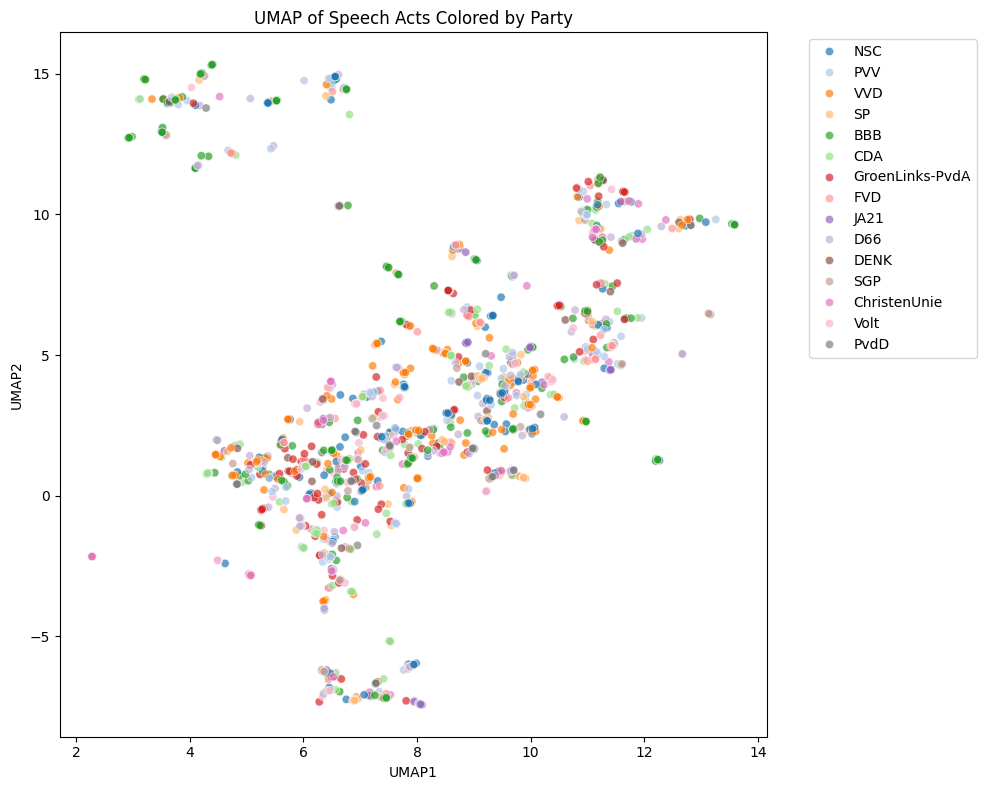

In [96]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_no_outliers,
    x='UMAP1', y='UMAP2',
    hue='party_x',
    palette='tab20',
    alpha=0.7
)
plt.title("UMAP of Speech Acts Colored by Party")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [98]:
pd.crosstab(df_no_outliers['party_x$'], df_no_outliers['KMeans_cluster'], normalize='index').round(2)


KMeans_cluster,0,2,3,5
party_x,,,,
BBB,0.38,0.25,0.33,0.04
CDA,0.57,0.04,0.28,0.11
ChristenUnie,0.64,0.03,0.27,0.06
D66,0.53,0.07,0.31,0.09
DENK,0.60,0.03,0.27,0.10
FVD,0.25,0.11,0.56,0.09
GroenLinks-PvdA,0.58,0.08,0.30,0.04
JA21,0.19,0.00,0.56,0.25
NSC,0.54,0.09,0.29,0.08
